In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [7]:
df= pd.read_csv(r"D:\DBDA\Adavance Stats\Day 6\titanic-tested.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [10]:
# Question 1\
# Draw a correlation plot between 'PassengerId','Pclass','Age','Survived','SibSp','Parch'

numeric_col =['PassengerId','Pclass','Age','Survived','SibSp','Parch']

corr = df.loc[:,numeric_col].corr()
print(corr)

             PassengerId    Pclass       Age  Survived     SibSp     Parch
PassengerId     1.000000 -0.026751 -0.034102 -0.023245  0.003818  0.043080
Pclass         -0.026751  1.000000 -0.492143 -0.108615  0.001087  0.018721
Age            -0.034102 -0.492143  1.000000 -0.000013 -0.091587 -0.061249
Survived       -0.023245 -0.108615 -0.000013  1.000000  0.099943  0.159120
SibSp           0.003818  0.001087 -0.091587  0.099943  1.000000  0.306895
Parch           0.043080  0.018721 -0.061249  0.159120  0.306895  1.000000


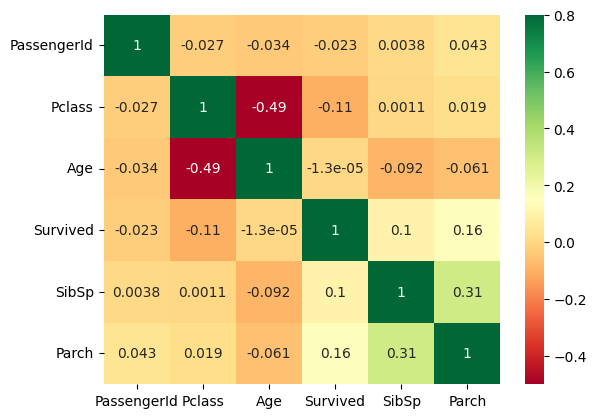

In [12]:
sns.heatmap(corr, vmin=-0.5,vmax=0.8,cmap='RdYlGn',annot=True)
plt.show()

C:\Users\dbda\AppData\Local\Temp\ipykernel_25532\1868898388.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age',data=df,palette="Blues")


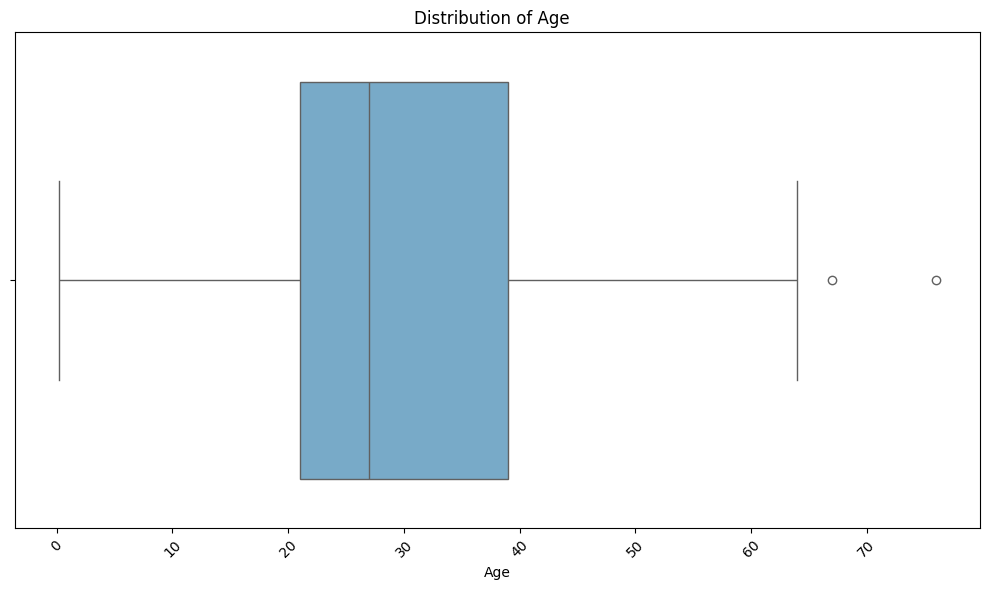

In [15]:
# Question 2
# Do an outlier detection on Age and create a box-plot for the same 

plt.figure(figsize=(10,6))
sns.boxplot(x='Age',data=df,palette="Blues")

plt.xlabel("Age")


plt.title("Distribution of Age  ")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
# Question 3

#perform a chi square test among a passenger class (column pclass) and survival(column survived) .Comment on the inference of the result


from scipy.stats import chi2_contingency


# Create a contingency table using crosstab
contingency_table = pd.crosstab(df["Pclass"], df["Survived"])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Contingency table:\n", contingency_table)
print("\nChi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)

# Interpret the results
if p > 0.05:
   print("\nThere is no statistically significant association between passenger class and survival.")
else:
   print("\nThere is a statistically significant association between passenger class and survival.")


Contingency table:
 Survived    0   1
Pclass           
1          57  50
2          63  30
3         146  72

Chi-square statistic: 6.693869422819262
p-value: 0.03519206276590605
Degrees of freedom: 2

There is a statistically significant association between passenger class and survival.
